# Stock Price Prediction

In [3]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
# Downloading data

start = '2014-01-01'
end = '2024-01-01'
stock = 'BTC-USD'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
# Data 
data.reset_index(inplace=True)

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3388,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032
3389,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014
3390,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055
3391,2023-12-30,42091.753906,42584.125000,41556.226562,42156.902344,42156.902344,16013925945


### Moving Averages
#### It is a mathematical formula used to find averages by using data to find trends and smooth out price action by filtering out 'noise' from random fluctuations. In stock market analysis, a 50 or 200-day moving average is most commonly used to see trends in the stock market and indicate where stocks are headed.
#### Now we gonna use MA 50 and MA 200

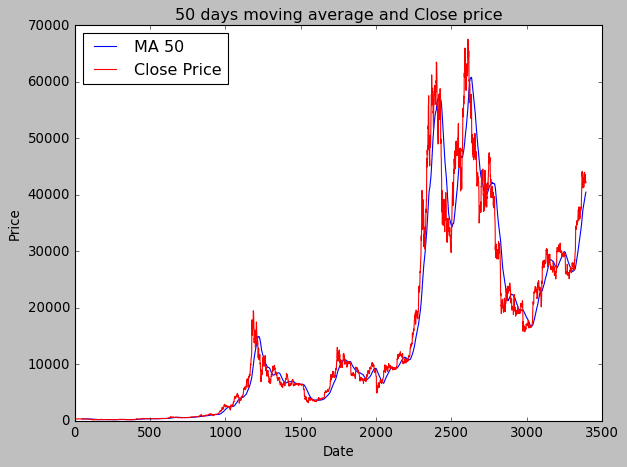

In [7]:
# Moving average of 100 days and showing on plot

ma_50 = data.Close.rolling(50).mean()
      
# Plot
plt.style.use('classic')


plt.figure(figsize=(8,6))
plt.plot(ma_50, 'b')
plt.plot(data.Close, 'r')

plt.title('50 days moving average and Close price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend(['MA 50', 'Close Price'],fontsize="large", loc='upper left')

plt.tight_layout()
plt.show()

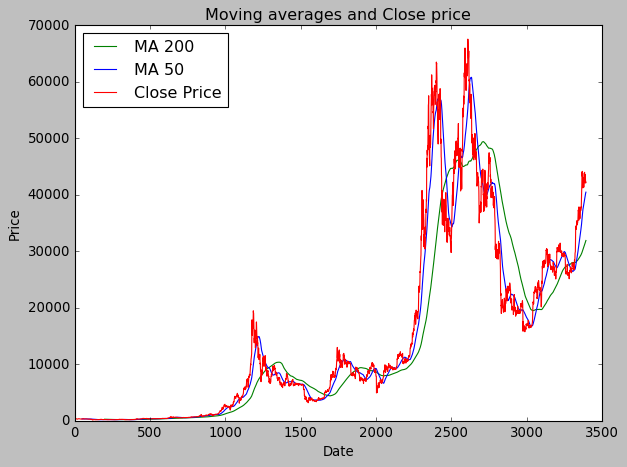

In [8]:
# Moving average of 200 days and showing on plot

ma_200 = data.Close.rolling(200).mean()
      
# Plot
plt.style.use('classic')


plt.figure(figsize=(8,6))
plt.plot(ma_200, 'g')
plt.plot(ma_50, 'b')
plt.plot(data.Close, 'r')

plt.title('Moving averages and Close price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend(['MA 200','MA 50', 'Close Price'],fontsize="large", loc='upper left')

plt.tight_layout()
plt.show()

## Pre Processing Data

In [10]:
# Data Clean up and remove NaN

data.dropna(inplace=True)

In [11]:
# Choose and fix train and test relativity 

data_train = data.Close[0: int(len(data)*0.80)]
data_test = data.Close[int(len(data)*0.80): len(data)]

In [12]:
# Train and Test dataset shape

data_train.shape, data_test.shape

((2714,), (679,))

In [13]:
# Normalize and fit Data Frame

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

data_train = np.array(data_train).reshape(2714, 1)
data_test = np.array(data_test).reshape(679, 1)

In [14]:
train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range (100, train_scale.shape[0]):
    x.append(train_scale[i-100:i])
    y.append(train_scale[i,0])

In [16]:
x = np.array(x)
y = np.array(y)

## Model Creation

In [18]:
# Import Libraries
from keras.layers import Dense, Dropout, LSTM, Input
from tensorflow.keras import Sequential

In [19]:
# Create Model

model = Sequential()

# Add Input layer
model.add(Input(shape=(x.shape[1], 1)))


# Model Dense

model.add(LSTM(units = 50, activation= 'relu', return_sequences = True ))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation= 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation= 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

# Model Optimizer

model.compile(optimizer = 'adam', loss='mean_squared_error')

# Model Fitting

model.fit(x , y , epochs = 50 ,batch_size = 32 , verbose = 1)

# Model Summary

model.summary()

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 0.0327
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0050
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0038
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0038
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0042
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0039
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0037
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0037
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0031
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0037
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0028
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0031
Epoch 13/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0031
Epoch 14/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0027
Epoch 15/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0026
Epoc

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

## Value Prediction from Model

In [21]:
# Convert numpy array to pandas DataFrame or Series for test data

data_train_df = pd.DataFrame(data_train)
data_test_df = pd.DataFrame(data_test)

past_100_days = data_train_df.tail(100)

data_test = pd.concat([past_100_days, data_test_df], ignore_index=True)

# fitting test data
data_test_scale = scaler.fit_transform(data_test_df)

In [22]:
x = []
y = []

for i in range (100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x = np.array(x)
y = np.array(y)

In [23]:
y_predict = model.predict(x)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [24]:
scale = 1/scaler.scale_

In [25]:
# let's calculate our values

y_predict = y_predict * scale
y = y * scale

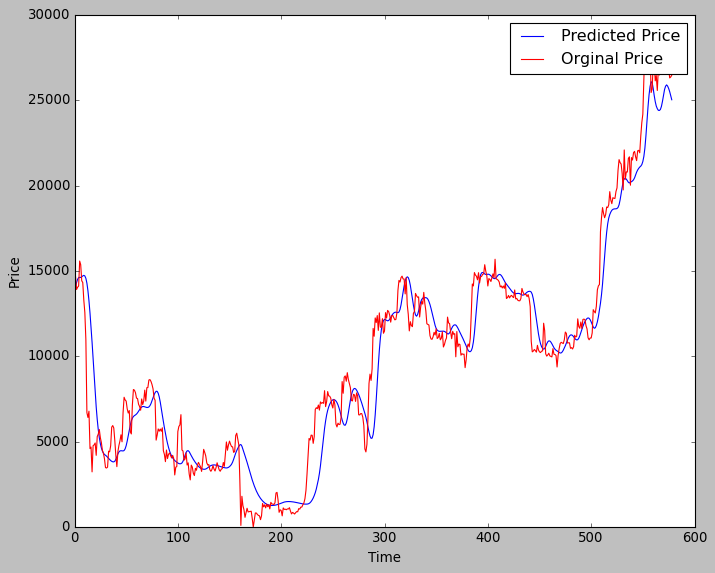

In [26]:
# Plot values

plt.figure(figsize = (10,8))

plt.plot(y_predict, 'b', label = 'Predicted Price')
plt.plot(y, 'r', label = 'Orginal Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Save Model

In [28]:
model.save("Stock Price Prediction Model.keras")